# Observable trends based on Data

- Temperature is definitely warmer as you approach the equator from either direction

- Humidity and Cloudines are correlated, as expected (can probably drop one to reduce workload)

- Wind Speed picks up as you move further from the equator, according to regression lines but more data is required for proper hypothesis testing 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [4]:
print(json.dumps(response, indent = 4))

{
    "coord": {
        "lon": -79.2353,
        "lat": 42.097
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 30.47,
        "feels_like": 24.4,
        "temp_min": 28.53,
        "temp_max": 31.59,
        "pressure": 1014,
        "humidity": 76
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.99,
        "deg": 295,
        "gust": 11.99
    },
    "clouds": {
        "all": 90
    },
    "dt": 1637624660,
    "sys": {
        "type": 2,
        "id": 2008828,
        "country": "US",
        "sunrise": 1637583362,
        "sunset": 1637617838
    },
    "timezone": -18000,
    "id": 5122534,
    "name": "Jamestown",
    "cod": 200
}


In [5]:
from datetime import datetime
import pytz

In [6]:
# MT list bins based on example df columns / rearranged 
datetime = []
country = []
city_name = []
max_temperature = []
humididty = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []

# Counter
counter = 0

# For loop followed by try/except/continue
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        datetime.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humididty.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Recorded {counter + 1} of 500 | {city_record}")
        counter += 1
    except:
        print("city nuked last min...sorry")
    if counter < 500:
        continue
    else:
        break
        
print(f"{counter} records filed. \nUpload Complete")

Recorded 1 of 500 | Punta Arenas
Recorded 2 of 500 | Rikitea
Recorded 3 of 500 | Vaini
Recorded 4 of 500 | Hermanus
Recorded 5 of 500 | Mataura
Recorded 6 of 500 | Mayo
Recorded 7 of 500 | Cidreira
Recorded 8 of 500 | Hobart
Recorded 9 of 500 | Arraial do Cabo
Recorded 10 of 500 | Yerbogachën
Recorded 11 of 500 | Nabire
Recorded 12 of 500 | Ushuaia
Recorded 13 of 500 | Khatanga
Recorded 14 of 500 | Mahébourg
Recorded 15 of 500 | New Norfolk
Recorded 16 of 500 | Bluff
Recorded 17 of 500 | Taltal
Recorded 18 of 500 | Chokurdakh
Recorded 19 of 500 | Kapaa
Recorded 20 of 500 | Saint-Philippe
Recorded 21 of 500 | Morón
Recorded 22 of 500 | Avarua
Recorded 23 of 500 | Teya
Recorded 24 of 500 | Crépy-en-Valois
Recorded 25 of 500 | Sangar
Recorded 26 of 500 | Bay Roberts
Recorded 27 of 500 | Rabo de Peixe
city nuked last min...sorry
Recorded 28 of 500 | Moerai
Recorded 29 of 500 | Acapulco de Juárez
Recorded 30 of 500 | Cape Town
Recorded 31 of 500 | Chui
city nuked last min...sorry
Recorded 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
date[0]

1637624587

In [42]:
from datetime import datetime
import pytz
datetime = datetime.fromtimestamp(date[0])
print("Unixdatetime =", datetime)

Unixdatetime = 2021-11-22 17:43:07


In [22]:
# dataframe based on example / rearranged for clarity
weather_df = {
    "Date" : datetime,
    "Country" : country,
    "City" : city_name,
    "Max Temperature" : max_temperature,
    "Cloudiness" : cloudiness,
    "Humidity" : humididty,
    "Wind Speed" : wind_speed,
    "Latitude" : latitude,
    "Longitude" : longitude
}
weather_df = pd.DataFrame(weather_df)
weather_df.count()

Date               500
Country            500
City               500
Max Temperature    500
Cloudiness         500
Humidity           500
Wind Speed         500
Latitude           500
Longitude          500
dtype: int64

In [23]:
weather_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)

In [24]:
weather_df.head()

,Date,Country,City,Max Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,1637624587,CL,Punta Arenas,46.51,75,49,19.57,-53.1500,-70.9167
1,1637624776,PF,Rikitea,75.67,0,67,11.95,-23.1203,-134.9692
2,1637625025,TO,Vaini,82.56,20,83,9.22,-21.2000,-175.2000
3,1637624781,ZA,Hermanus,63.90,90,74,11.12,-34.4187,19.2345
4,1637624868,NZ,Mataura,60.48,47,48,4.12,-46.1927,168.8643


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
weather_df.describe()

,Date,Max Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.637625e+09,53.422120,59.622000,73.254000,8.298800,19.157933,17.215717
std,1.857201e+02,28.063911,37.134473,19.174065,6.105203,34.098718,90.381244
min,1.637625e+09,-32.060000,0.000000,11.000000,0.000000,-54.800000,-175.200000
25%,1.637625e+09,36.640000,23.000000,65.000000,3.575000,-8.964025,-60.850075
50%,1.637625e+09,62.340000,75.000000,78.000000,6.910000,20.115950,24.699050
75%,1.637625e+09,75.225000,96.000000,88.000000,11.462500,49.008075,95.932150
max,1.637625e+09,97.880000,100.000000,100.000000,28.540000,78.218600,178.416700


In [26]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_df["City"].loc[weather_df["Humidity"] > 100].count()
high_humidity

0

# No Cities with humidity greater than 100% 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

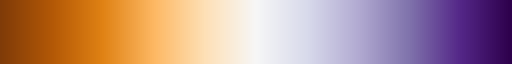

In [58]:
plt.get_cmap("PuOr")

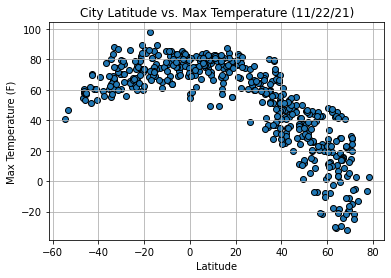

In [67]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"],cmap = "blue", edgecolors= "black")
plt_date = datetime.fromtimestamp(date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Max Temperature ({plt_date})")
x_lat = weather_df["Latitude"]
y_temp = weather_df["Max Temperature"]
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(b=True)

plt.savefig("../Images/City_Latitude_vs_Max_Temperature.png")

plt.show()

#### The above plot depicts higher temps just south of the equator and lower as we go further north

## Latitude vs. Humidity Plot

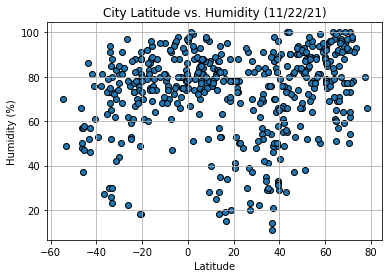

In [68]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"],cmap = "blue", edgecolors= "black")
plt_date = datetime.fromtimestamp(date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({plt_date})")
x_lat = weather_df["Latitude"]
y_temp = weather_df["Humidity"]
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(b=True)

plt.savefig("../Images/City_Latitude_vs_Humidity.png")

plt.show()

#### The above plot depicts high humidity (above 60%) for majority of cities, regardless of latitude

## Latitude vs. Cloudiness Plot

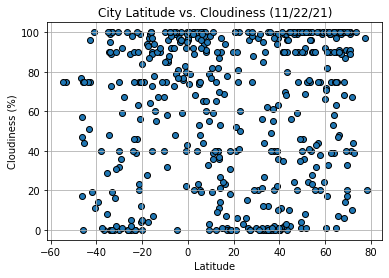

In [120]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"],cmap = "blue", edgecolors= "black")
plt_date = datetime.fromtimestamp(date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Cloudiness ({plt_date})")
x_lat = weather_df["Latitude"]
y_temp = weather_df["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(b=True)

plt.savefig("../Images/City_Latitude_vs_Cloudiness.png")

plt.show()

#### The above plot depicts higher plot clusters near 100% Cloudiness between lat -10 through 78

## Latitude vs. Wind Speed Plot

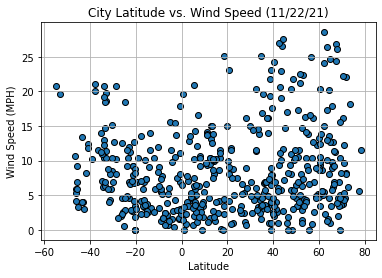

In [70]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"],cmap = "blue", edgecolors= "black")
plt_date = datetime.fromtimestamp(date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Wind Speed ({plt_date})")
x_lat = weather_df["Latitude"]
y_temp = weather_df["Wind Speed"]
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(b=True)

plt.savefig("../Images/City_Latitude_vs_Wind_Speed.png")

plt.show()

#### The above plot depicts plot clusters between 0 to 10 MPH overall. Also, stronger outlier wind speeds up North

In [78]:
import scipy.stats as st
import os

## Linear Regression

In [79]:
north_df = weather_df[weather_df["Latitude"] >= 0]
south_df = weather_df[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temperature vs. Latitude Linear Regression

Correlation Coefficient = -0.86
R-Value = -0.86


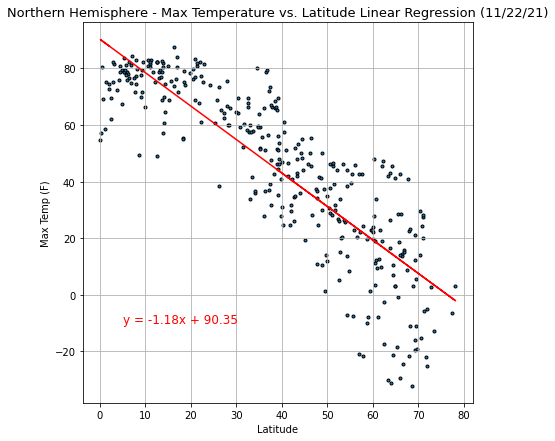

In [105]:
north_x_lat = north_df["Latitude"]
north_y_temp = north_df["Max Temperature"]

north_corr_co = round(st.pearsonr(north_x_lat, north_y_temp)[0], 2)
n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"Correlation Coefficient = {north_corr_co}\nR-Value = {round(n_temp.rvalue,2)}")

line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope, 2)}x + {round(n_temp.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(north_x_lat, line, "r-")
plt.title(f"Northern Hemisphere - Max Temperature vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.annotate(line_eq, (5,-10), fontsize=12, color="red")

file = os.path.join("../Images/North_lat_temp.png")
plt.savefig(file)

####  Southern Hemisphere - Max Temperature vs. Latitude Linear Regression

Correlation Coefficient = 0.6
R-Value = 0.6


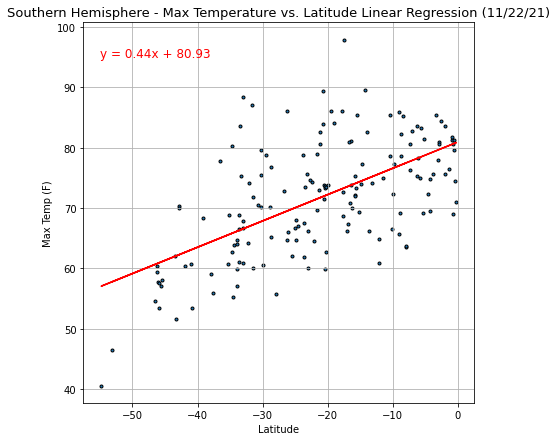

In [106]:
south_x_lat = south_df["Latitude"]
south_y_temp = south_df["Max Temperature"]

south_corr_co = round(st.pearsonr(south_x_lat, south_y_temp)[0], 2)
s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"Correlation Coefficient = {south_corr_co}\nR-Value = {round(s_temp.rvalue,2)}")

line = s_temp.slope * south_x_lat + s_temp.intercept
line_eq = f"y = {round(s_temp.slope, 2)}x + {round(s_temp.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(south_x_lat, south_y_temp, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(south_x_lat, line, "r-")
plt.title(f"Southern Hemisphere - Max Temperature vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.annotate(line_eq, (-55,95), fontsize=12, color="red")

file = os.path.join("../Images/South_lat_temp.png")
plt.savefig(file)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation Coefficient = 0.17
R-Value = 0.17


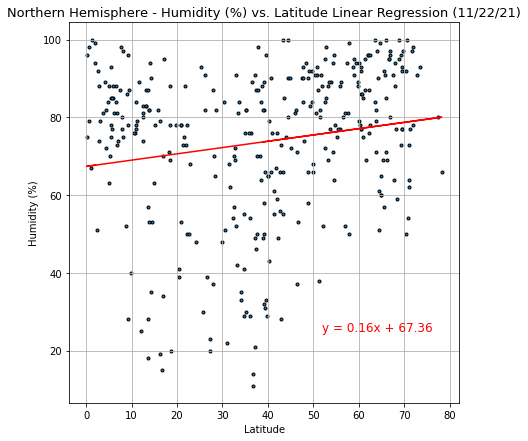

In [111]:
north_x_lat = north_df["Latitude"]
north_y_humid = north_df["Humidity"]

north_corr_co = round(st.pearsonr(north_x_lat, north_y_humid)[0], 2)
n_humid = st.linregress(north_x_lat, north_y_humid)
print(f"Correlation Coefficient = {north_corr_co}\nR-Value = {round(n_humid.rvalue,2)}")

line = n_humid.slope * north_x_lat + n_humid.intercept
line_eq = f"y = {round(n_humid.slope, 2)}x + {round(n_humid.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_humid, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(north_x_lat, line, "r-")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.annotate(line_eq, (52,25), fontsize=12, color="red")

file = os.path.join("../Images/North_lat_humid.png")
plt.savefig(file)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation Coefficient = 0.43
R-Value = 0.43


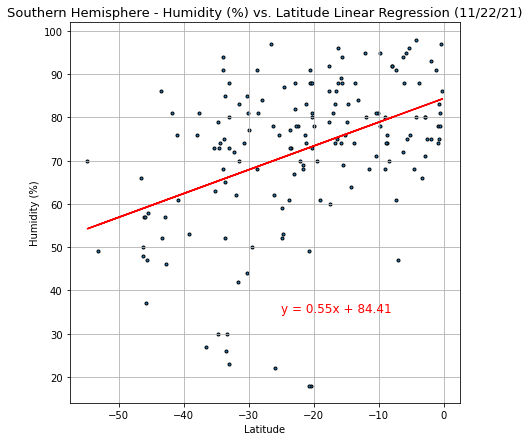

In [112]:
south_x_lat = south_df["Latitude"]
south_y_humid = south_df["Humidity"]

south_corr_co = round(st.pearsonr(south_x_lat, south_y_humid)[0], 2)
s_humid = st.linregress(south_x_lat, south_y_humid)
print(f"Correlation Coefficient = {south_corr_co}\nR-Value = {round(s_humid.rvalue,2)}")

line = s_humid.slope * south_x_lat + s_humid.intercept
line_eq = f"y = {round(s_humid.slope, 2)}x + {round(s_humid.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(south_x_lat, south_y_humid, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(south_x_lat, line, "r-")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.annotate(line_eq, (-25,35), fontsize=12, color="red")

file = os.path.join("../Images/South_lat_humid.png")
plt.savefig(file)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation Coefficient = 0.11
R-Value = 0.11


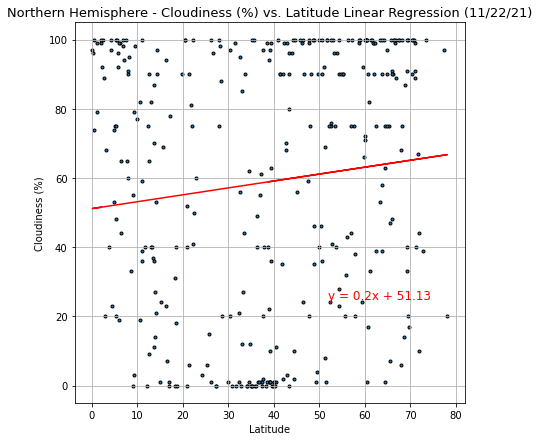

In [115]:
north_x_lat = north_df["Latitude"]
north_y_cloud = north_df["Cloudiness"]

north_corr_co = round(st.pearsonr(north_x_lat, north_y_cloud)[0], 2)
n_cloud = st.linregress(north_x_lat, north_y_cloud)
print(f"Correlation Coefficient = {north_corr_co}\nR-Value = {round(n_cloud.rvalue,2)}")

line = n_cloud.slope * north_x_lat + n_cloud.intercept
line_eq = f"y = {round(n_cloud.slope, 2)}x + {round(n_cloud.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_cloud, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(north_x_lat, line, "r-")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.annotate(line_eq, (52,25), fontsize=12, color="red")

file = os.path.join("../Images/North_lat_cloud.png")
plt.savefig(file)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation Coefficient = 0.31
R-Value = 0.31


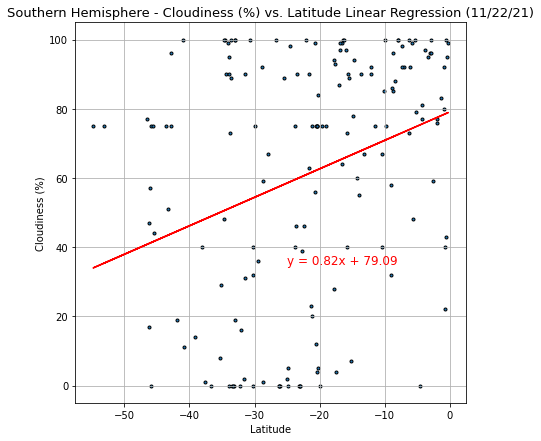

In [114]:
south_x_lat = south_df["Latitude"]
south_y_cloud = south_df["Cloudiness"]

south_corr_co = round(st.pearsonr(south_x_lat, south_y_cloud)[0], 2)
s_cloud = st.linregress(south_x_lat, south_y_cloud)
print(f"Correlation Coefficient = {south_corr_co}\nR-Value = {round(s_cloud.rvalue,2)}")

line = s_cloud.slope * south_x_lat + s_cloud.intercept
line_eq = f"y = {round(s_cloud.slope, 2)}x + {round(s_cloud.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(south_x_lat, south_y_cloud, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(south_x_lat, line, "r-")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.annotate(line_eq, (-25,35), fontsize=12, color="red")

file = os.path.join("../Images/South_lat_cloud.png")
plt.savefig(file)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation Coefficient = 0.19
R-Value = 0.19


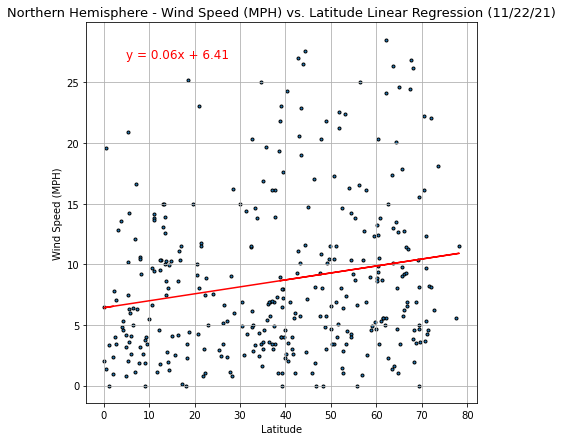

In [117]:
north_x_lat = north_df["Latitude"]
north_y_wind = north_df["Wind Speed"]

north_corr_co = round(st.pearsonr(north_x_lat, north_y_wind)[0], 2)
n_wind = st.linregress(north_x_lat, north_y_wind)
print(f"Correlation Coefficient = {north_corr_co}\nR-Value = {round(n_wind.rvalue,2)}")

line = n_wind.slope * north_x_lat + n_wind.intercept
line_eq = f"y = {round(n_wind.slope, 2)}x + {round(n_wind.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_wind, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(north_x_lat, line, "r-")
plt.title(f"Northern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.annotate(line_eq, (5,27), fontsize=12, color="red")

file = os.path.join("../Images/North_lat_wind.png")
plt.savefig(file)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation Coefficient = -0.35
R-Value = -0.35


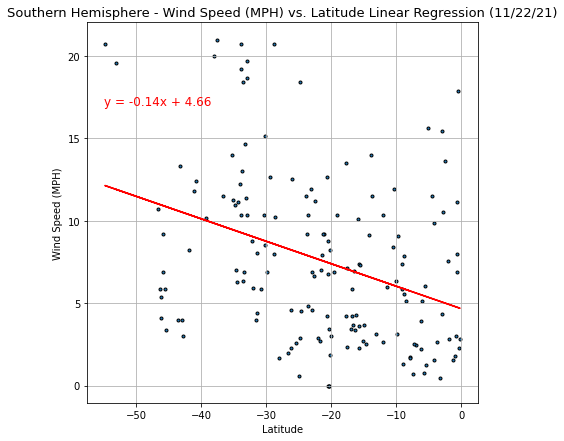

In [119]:
south_x_lat = south_df["Latitude"]
south_y_wind = south_df["Wind Speed"]

south_corr_co = round(st.pearsonr(south_x_lat, south_y_wind)[0], 2)
s_wind = st.linregress(south_x_lat, south_y_wind)
print(f"Correlation Coefficient = {south_corr_co}\nR-Value = {round(s_wind.rvalue,2)}")

line = s_wind.slope * south_x_lat + s_wind.intercept
line_eq = f"y = {round(s_wind.slope, 2)}x + {round(s_wind.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(south_x_lat, south_y_wind, marker=".", cmap = "blue", edgecolors = "black")
plt.plot(south_x_lat, line, "r-")
plt.title(f"Southern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression ({plt_date})", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.annotate(line_eq, (-55,17), fontsize=12, color="red")

file = os.path.join("../Images/South_lat_wind.png")
plt.savefig(file)